In [1]:
import matplotlib.pyplot as plt
import autograd.numpy as np

from matplotlib.colors import LogNorm
from IPython.display import HTML

from autograd import elementwise_grad, value_and_grad
from scipy.optimize import minimize
from collections import defaultdict

from functools import partial

from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm

import tensorflow as tf
import numpy as np

In [2]:
from numdifftools import Jacobian, Hessian

def fun(x):
    return (x[0]**2 + x[1]**2) + (0.5*x[0] + x[1])**2 + (0.5*x[0] + x[1])**4

def fun_der(x):
    return Jacobian(lambda x: fun(x))(x).ravel()

def fun_hess(x):
    return Hessian(lambda x: fun(x))(x)

def make_minimize_cb(path=[]):
    def minimize_cb(xk):
        path.append(np.copy(xk))
    return minimize_cb


def f(x, y):
    return (x**2 + y**2) + (0.5*x + y)**2 + (0.5*x + y)**4

minima = np.array([0, 0])
start_point = np.array([8, 8])
minima_ = minima.reshape(-1, 1)

xmin, xmax = -10, 10
ymin, ymax = xmin, xmax

print (f(*minima))

X = np.arange(xmin, xmax, 0.25)
Y = np.arange(xmin, xmax, 0.25)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)

0.0


In [3]:
methods = ['trust-ncg', 'dogleg']

minimize_ = partial(minimize, fun=fun, x0=start_point, jac=fun_der, hess=fun_hess, bounds=[(-4.5, 4.5), (-4.5, 4.5)], tol=1e-20)

paths_ = defaultdict(list)
for method in methods:
    paths_[method].append(start_point)
    
results = {method: minimize_(method=method, callback=make_minimize_cb(paths_[method])) for method in methods}

paths = [np.array(paths_[method]).T for method in methods]

zpaths = [fun(path) for path in paths]

/anaconda3/envs/enchantment/lib/python3.6/site-packages/scipy/optimize/_minimize.py:518: RuntimeWarning: Method trust-ncg cannot handle constraints nor bounds.
  RuntimeWarning)
/anaconda3/envs/enchantment/lib/python3.6/site-packages/scipy/optimize/_minimize.py:518: RuntimeWarning: Method dogleg cannot handle constraints nor bounds.
  RuntimeWarning)


/anaconda3/envs/enchantment/lib/python3.6/site-packages/matplotlib/contour.py:1484: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


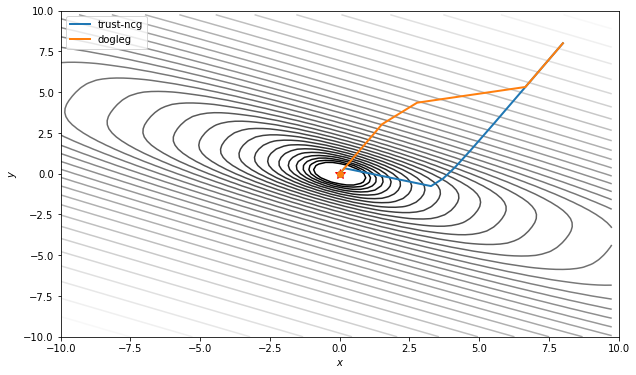

In [4]:
from animation import TrajectoryAnimation, TrajectoryAnimation
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(X, Y, Z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=cm.gray)
ax.plot([minima[0]], [minima[1]], 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

anim = TrajectoryAnimation(paths, labels=methods, ax=ax)

ax.legend(loc='upper left')


HTML(anim.to_html5_video())

#anim.save('zakharov2.gif', dpi=80, writer='imagemagick')